<a href="https://colab.research.google.com/github/BanpoCorgi/CA-work/blob/main/CA_Tech_lounge_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Library install

In [ ]:
pip install -U scikit-learn pandas numpy seaborn

Note: you may need to restart the kernel to use updated packages.


### Library import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV,learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Set Information:

Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

Some background information for these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value.

As for primary major tree species in these areas, Neota would have spruce/fir (type 1), while Rawah and Comanche Peak would probably have lodgepole pine (type 2) as their primary species, followed by spruce/fir and aspen (type 5). Cache la Poudre would tend to have Ponderosa pine (type 3), Douglas-fir (type 6), and cottonwood/willow (type 4).

The Rawah and Comanche Peak areas would tend to be more typical of the overall dataset than either the Neota or Cache la Poudre, due to their assortment of tree species and range of predictive variable values (elevation, etc.) Cache la Poudre would probably be more unique than the others, due to its relatively low elevation range and species composition.

# Attribute Information:

Elevation / quantitative /meters / Elevation in meters
<br>Aspect / quantitative / azimuth / Aspect in degrees azimuth
<br>Slope / quantitative / degrees / Slope in degrees
<br>Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
<br>Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
<br>Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
<br>Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
<br>Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
<br>Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
<br>Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
<br>Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
<br>Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
<br>Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

## Summary
<br> 1. The data is in raw form and contains binary columns of data for qualitative independent variables such as wilderness areas and soil types.
<br>要約
<br>  Soil Type, wilderness データ= binary => 分析する時に他の独立変数を2種類で分けて考えた方がいい
<br> 2. The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado, representing forests with minimal human-caused disturbances.
<br> 3. Neota has the highest mean elevational value, Rawah and Comanche Peak have a lower mean elevational value, while Cache la Poudre has the lowest mean elevational value.
<br>要約
<br>   Neota : highest mean elevational value
<br>   Rawah : lower mean elevational value
<br>   Comanche Peak : lower mean elevational value
<br>   Cache la Poudre : lowest mean elevational value
<br> 4. Primary major tree species in these areas are spruce/fir for Neota, lodgepole pine for Rawah and Comanche Peak, and Ponderosa pine, Douglas-fir, and cottonwood/willow for Cache la Poudre.
<br>要約
<br>    Primary major tree species
<br>    Neota : spruce/fir
<br>    Rawah : lodgepole pine
<br>    Comanche Peak : lodgepole pine
<br>    Cache la Poudre : Ponderosa pine, Douglas-fir, and cottonwood/willow
<br> 5. Rawah and Comanche Peak are more typical of the overall dataset, while Cache la Poudre is more unique due to its relatively low elevation range and species composition.
<br>要約
<br>    Rawah, Comanche Peak : more typical
<br>    Cache la Poudre :  more unique (why : relatively low elevation range, species composition)3



### データの文脈をタイトルから理解する

「Forest cover」は、森林が覆っている地域を指す英語の表現です。森林は自然生態系の重要な構成要素であるため、森林面積や森林が占める割合は環境管理や保護にとって非常に重要な指標の一つです。


#####Research Question : 気候や標高などの環境条件から森林に生える木の種類をどのような機械学習モデルで適切に分類できるのか？
##### <br>How can we classify tree species that occupy a forest based on environmental conditions such as climate and elevation, using a suitable machine learning model?

--------------------

# Reference
<small style="font-size: 15px;">
ChatGPT -> Code fixing and reducing time for searching
<br>http://archive.ics.uci.edu/ml/datasets/Covertype
<br>https://rstudio-pubs-static.s3.amazonaws.com/160297_f7bcb8d140b74bd19b758eb328344908.html
<br>https://gist.github.com/sharmaeklavya2/f57cd679777822eb58bf18f254be3d02 
<br>->このページの多くの部分が役に立ちましたが、そのまま真似せずに自分で学習後、考えを込めるように努めました。
<br>https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/
</small>

用語説明
<br>参照:ChatGPT, Google検索を主に参考して自分の考えで書きました。
<br>引用:自分でも考えみたが他者のコードがもっとよさそうだったので使いました。

#### ChatGPT 参照↓
These attributes are commonly used in the scikit-learn library to represent datasets, where data stores the feature data, target stores the labels or target variable, and feature_names stores the names of the features. 


### Data setting
#### ChatGPT 参照↓
.data, .feature_names

In [ ]:
covtype = fetch_covtype()
data = pd.DataFrame(covtype.data, columns=covtype.feature_names)

# 分類のためのEDA
<br>目的:データ中身観察やグラフ観察

In [ ]:
covtype.feature_names

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area_0',
 'Wilderness_Area_1',
 'Wilderness_Area_2',
 'Wilderness_Area_3',
 'Soil_Type_0',
 'Soil_Type_1',
 'Soil_Type_2',
 'Soil_Type_3',
 'Soil_Type_4',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39']

In [ ]:
#Null値チェック
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


In [ ]:
#binary チェック
cnt = 0
for i in range(40):
    check = data[(data[f"Soil_Type_{i}"]>1)&(data[f"Soil_Type_{i}"]<0)]
    cnt =+ check.shape[0]
cnt

0

In [ ]:
#binary チェック
cnt = 0
for i in range(4):
    check = data[(data[f"Wilderness_Area_{i}"]>1)&(data[f"Wilderness_Area_{i}"]<0)]
    cnt =+ check.shape[0]
cnt

0

# Machine learning Setting
###Reference https://gist.github.com/sharmaeklavya2/f57cd679777822eb58bf18f254be3d02 引用

In [ ]:
quant_var = data.drop(['Wilderness_Area_0',
 'Wilderness_Area_1',
 'Wilderness_Area_2',
 'Wilderness_Area_3',
 'Soil_Type_0',
 'Soil_Type_1',
 'Soil_Type_2',
 'Soil_Type_3',
 'Soil_Type_4',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39'], axis=1)
target = 'Cover_Type'
quant_var[target] = covtype.target #Make target variables
dist = 100*quant_var["Cover_Type"].value_counts()/quant_var["Cover_Type"].count() # Covertype -> dependent varible
quant_var

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,5
...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,3


## Cover Type分布観察

↓Reference https://gist.github.com/sharmaeklavya2/f57cd679777822eb58bf18f254be3d02 参照

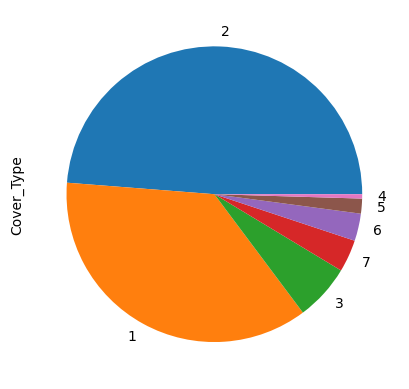

In [ ]:
dist.plot(kind = 'pie')
plt.show()

In [ ]:
dist

2    48.759922
1    36.460521
3     6.153746
7     3.530048
6     2.989095
5     1.633873
4     0.472796
Name: Cover_Type, dtype: float64

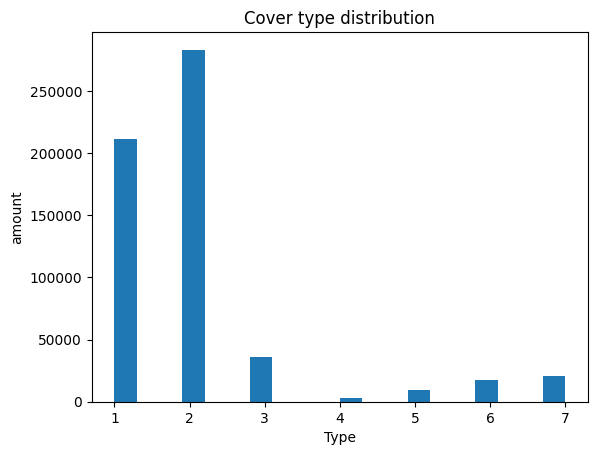

In [ ]:
plt.hist(quant_var["Cover_Type"], bins= 20)
plt.title('Cover type distribution')
plt.xlabel("Type")
plt.ylabel("amount")
plt.show()

## 相関係数で全体像観察

<Axes: >

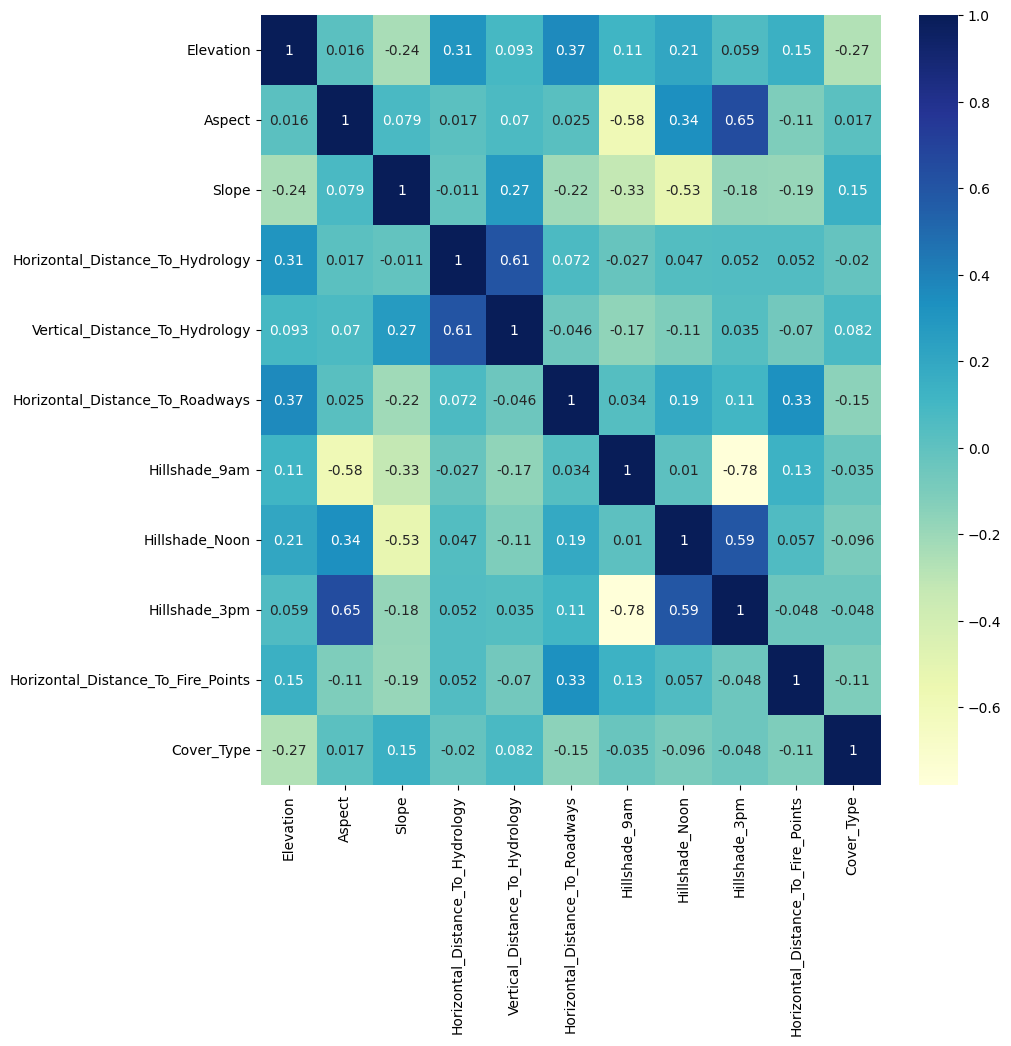

In [ ]:
corr_matrix = quant_var.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

## 変数別ヒストグラム動向観察

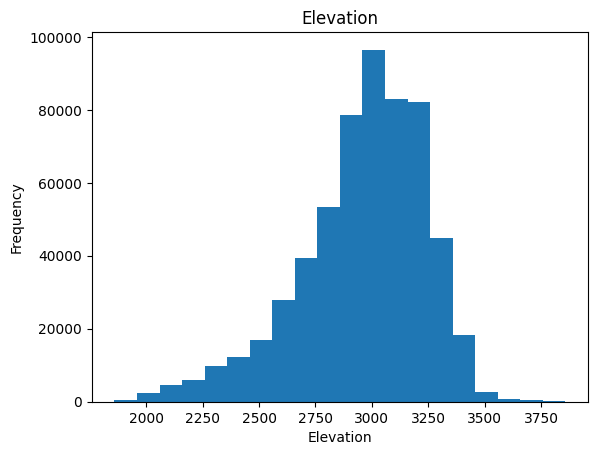

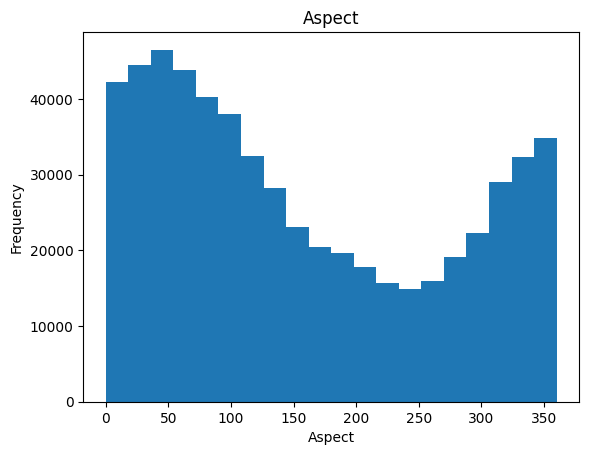

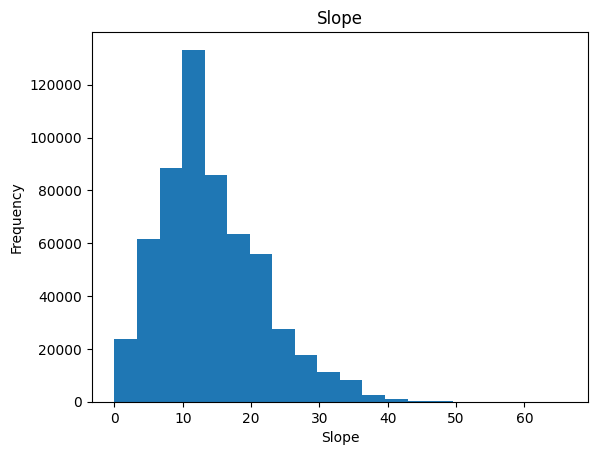

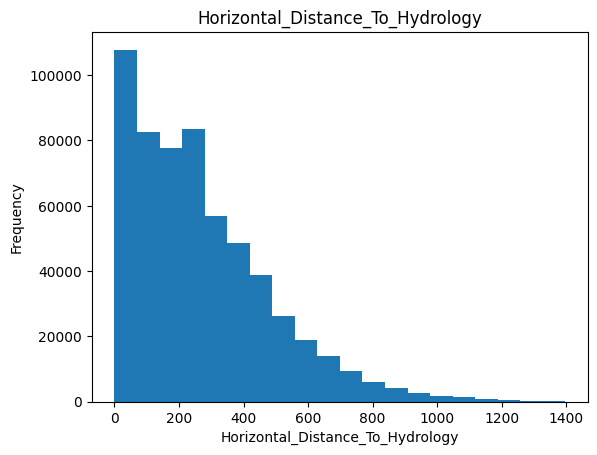

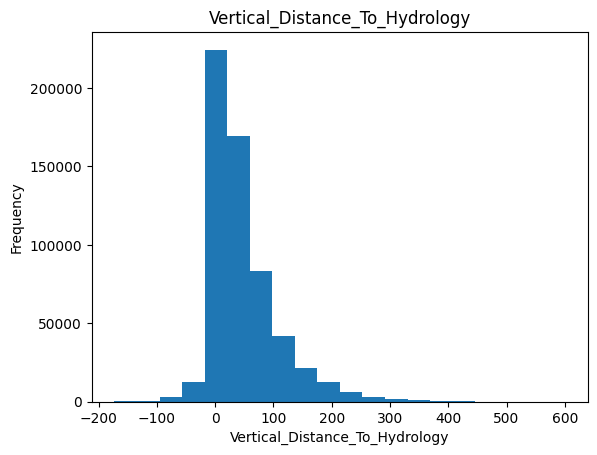

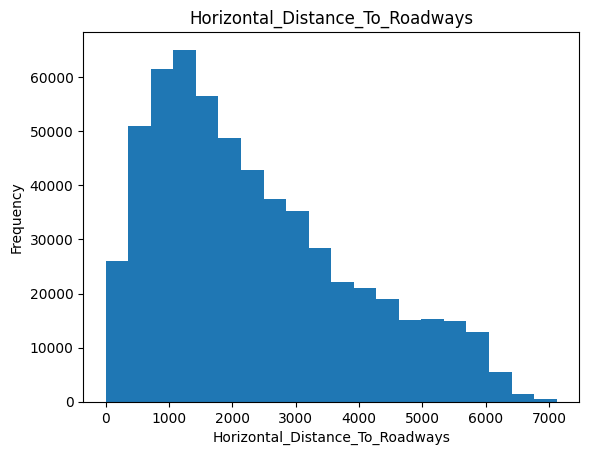

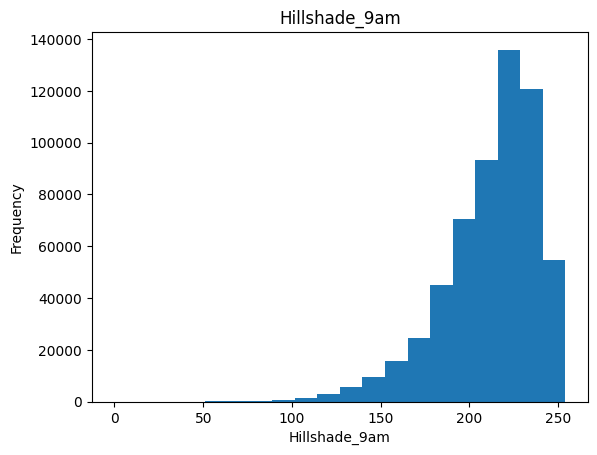

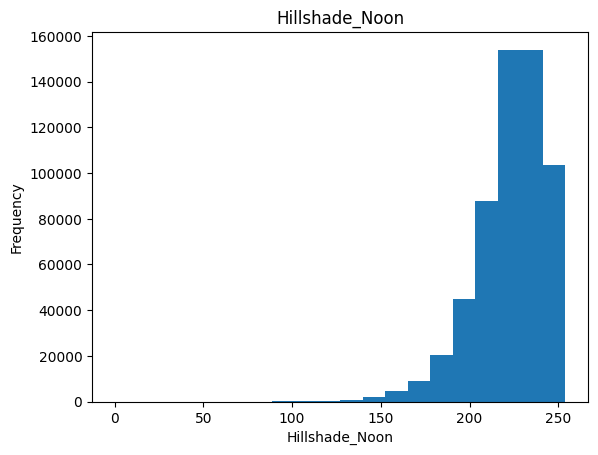

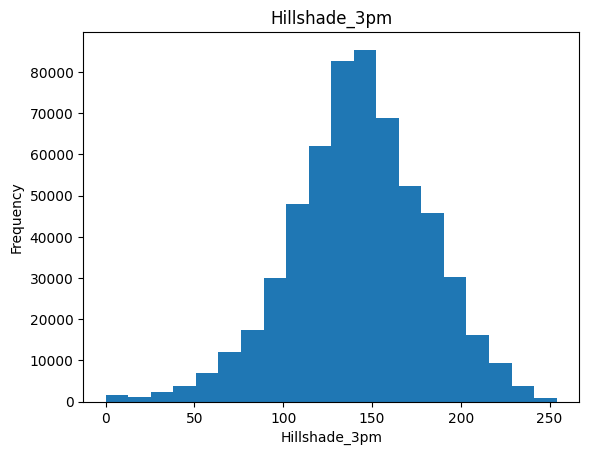

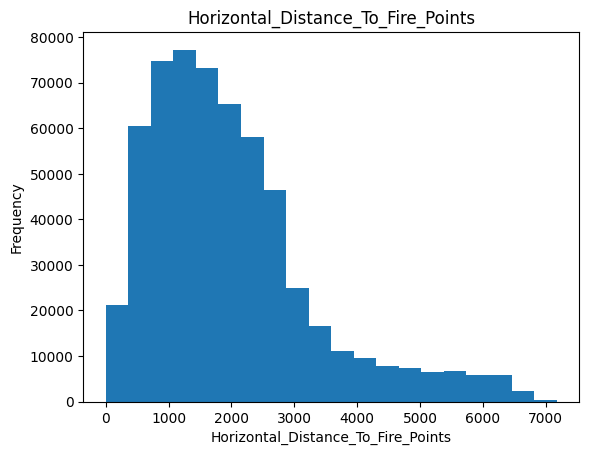

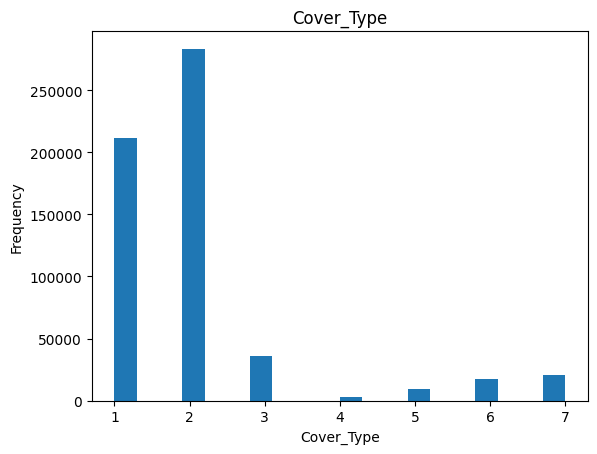

In [ ]:
for c in quant_var.columns:
    plt.hist(quant_var[c], bins=20)
    plt.xlabel(c)
    plt.ylabel("Frequency")
    plt.title(f"{c}")
    plt.show()

### ChatGPT 参照↓

Used Prompt
<br>How can I arrange two graphs side by side?

Used code

In [ ]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# axs[0].plot(quant_var['Horizontal_Distance_To_Hydrology'], quant_var['Vertical_Distance_To_Hydrology'])
# axs[0].set_title('Subplot 1')

# axs[1].plot(quant_var['Horizontal_Distance_To_Roadways'], quant_var['Elevation'])
# axs[1].set_title('Subplot 2')

### Elevation
ChatGPT参照↓

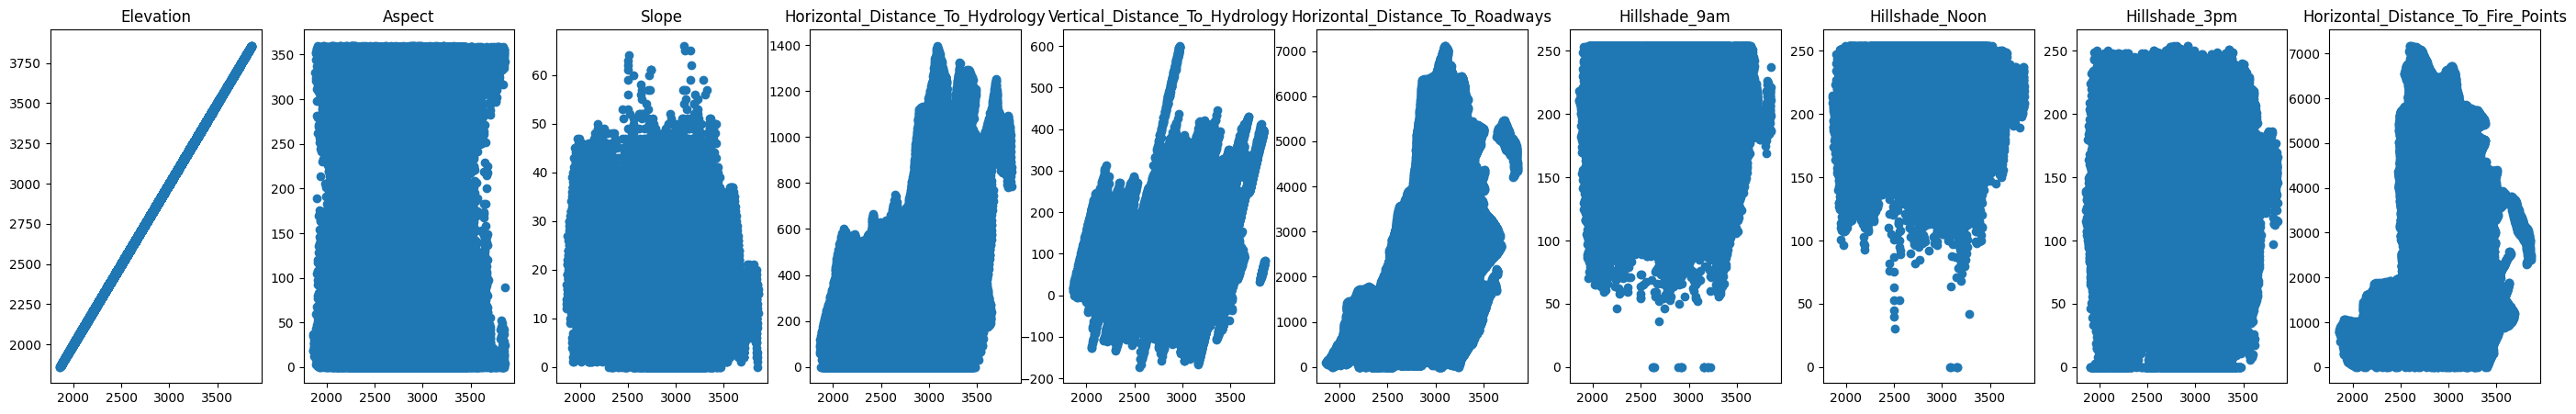

In [ ]:
fig, axs = plt.subplots(1, len(quant_var.columns)-1, figsize=(35, 5))

for i, c in enumerate(quant_var.columns[:-1]):
    axs[i].scatter(quant_var["Elevation"], quant_var[c])
    axs[i].set_title(c)

plt.show()

↓Reference https://gist.github.com/sharmaeklavya2/f57cd679777822eb58bf18f254be3d02 引用
<br>Cover_Typeが7つに分かれているのでindependent variableとの関係性を証明していきます。

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


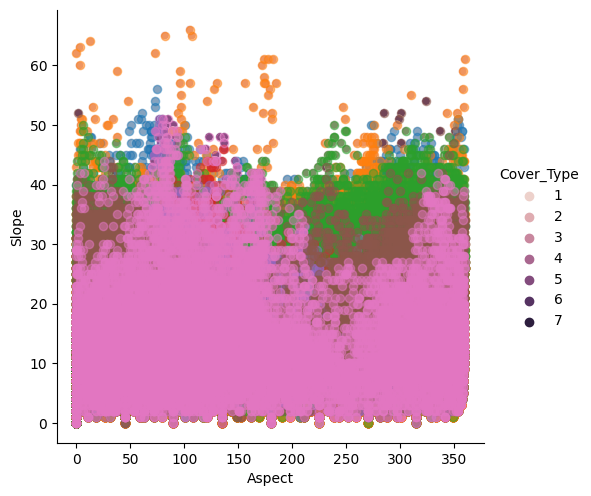

In [ ]:
as_sl = sns.pairplot(quant_var, hue="Cover_Type", size=5,
             x_vars=['Aspect'], y_vars=['Slope'])
as_sl.map_offdiag(plt.scatter, s=35, alpha=0.5)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


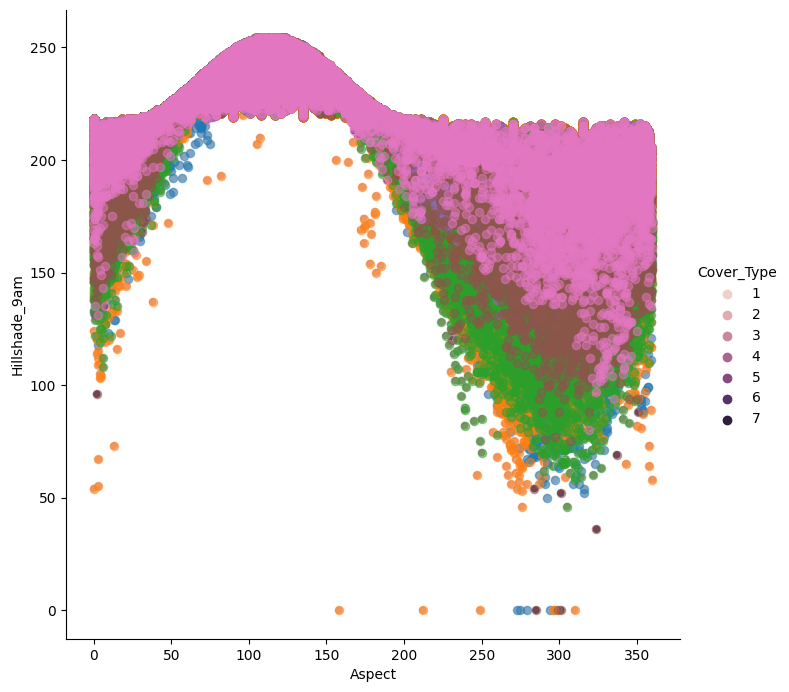

In [ ]:
as_h9 = sns.pairplot(quant_var, hue="Cover_Type", size=7,
             x_vars=['Aspect'], y_vars=['Hillshade_9am'])
as_h9.map_offdiag(plt.scatter, s=35, alpha=0.5)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


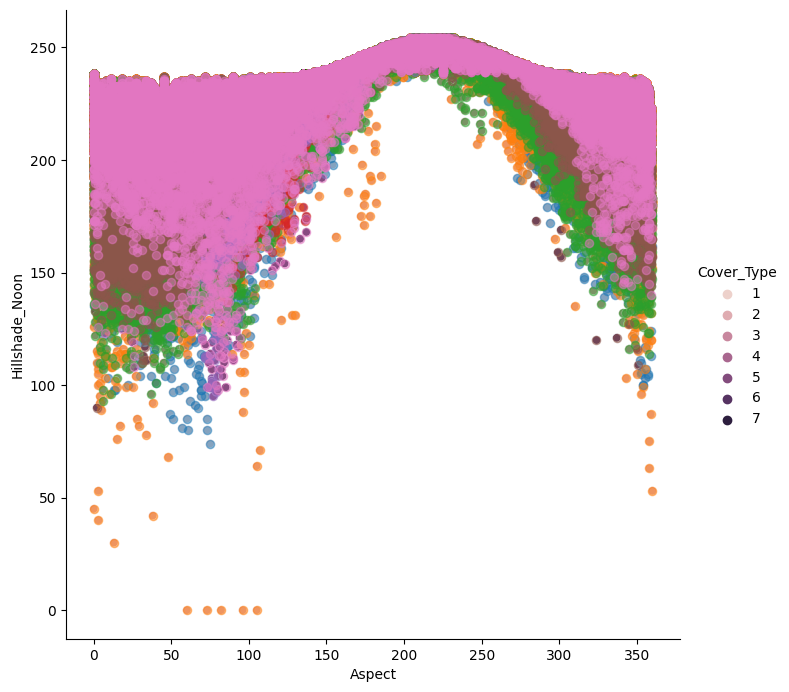

In [ ]:
as_h12 = sns.pairplot(quant_var, hue="Cover_Type", size=7,
             x_vars=['Aspect'], y_vars=['Hillshade_Noon'])
as_h12.map_offdiag(plt.scatter, s=35, alpha=0.5)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


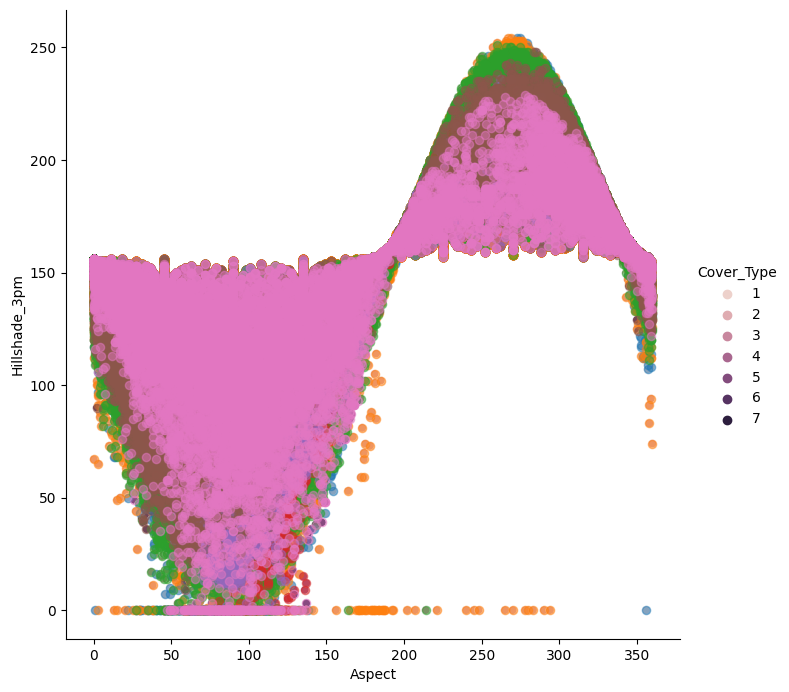

In [ ]:
as_h15 = sns.pairplot(quant_var, hue="Cover_Type", size=7,
             x_vars=['Aspect'], y_vars=['Hillshade_3pm'])
as_h15.map_offdiag(plt.scatter, s=35, alpha=0.5)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


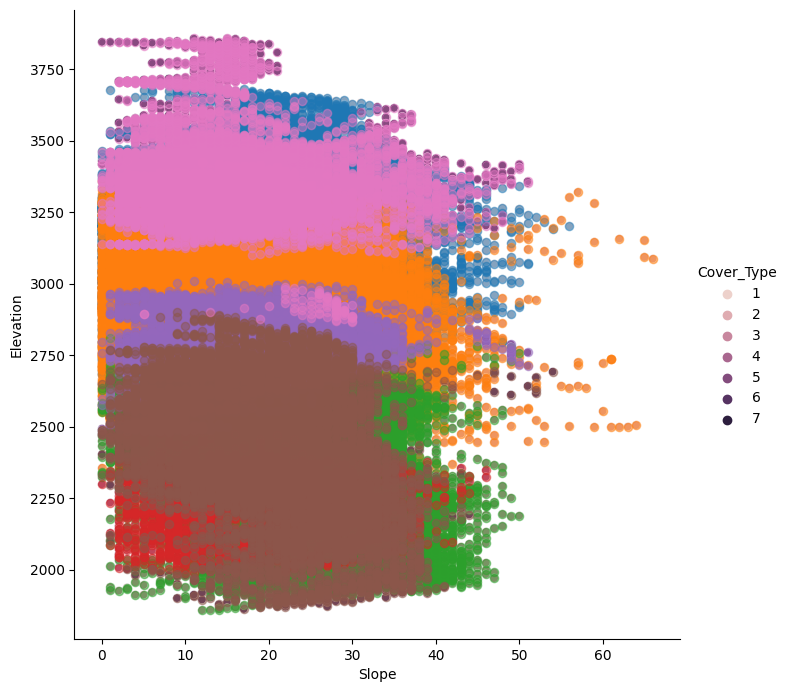

In [ ]:
#ElevationがY軸になるのが直感的に分かりやすいので
sl_el = sns.pairplot(quant_var, hue="Cover_Type", size=7,
             x_vars=['Slope'], y_vars=['Elevation'])
sl_el.map_offdiag(plt.scatter, s=35, alpha=0.5)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


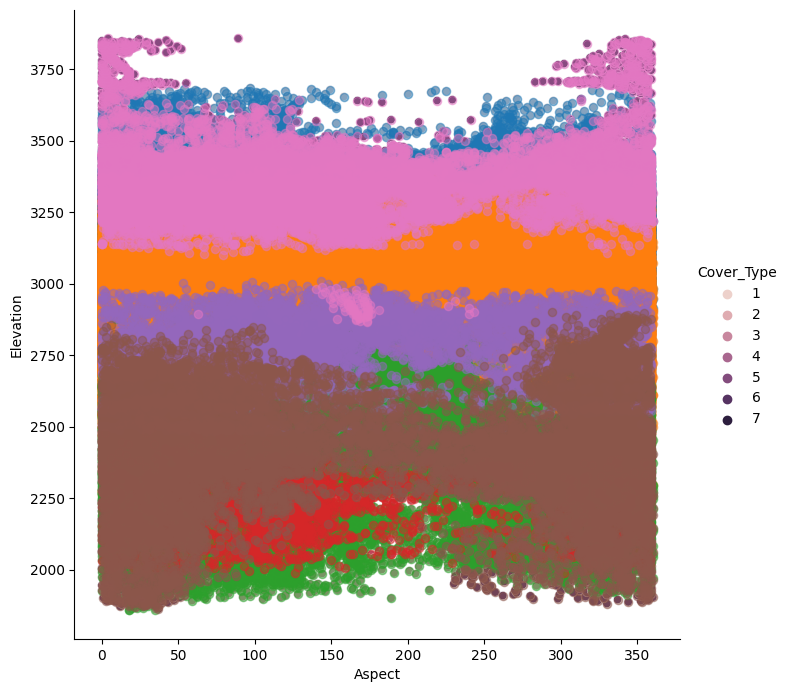

In [ ]:
as_al = sns.pairplot(quant_var, hue="Cover_Type", size=7,
             x_vars=['Aspect'], y_vars=['Elevation'])
as_al.map_offdiag(plt.scatter, s=35, alpha=0.5)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


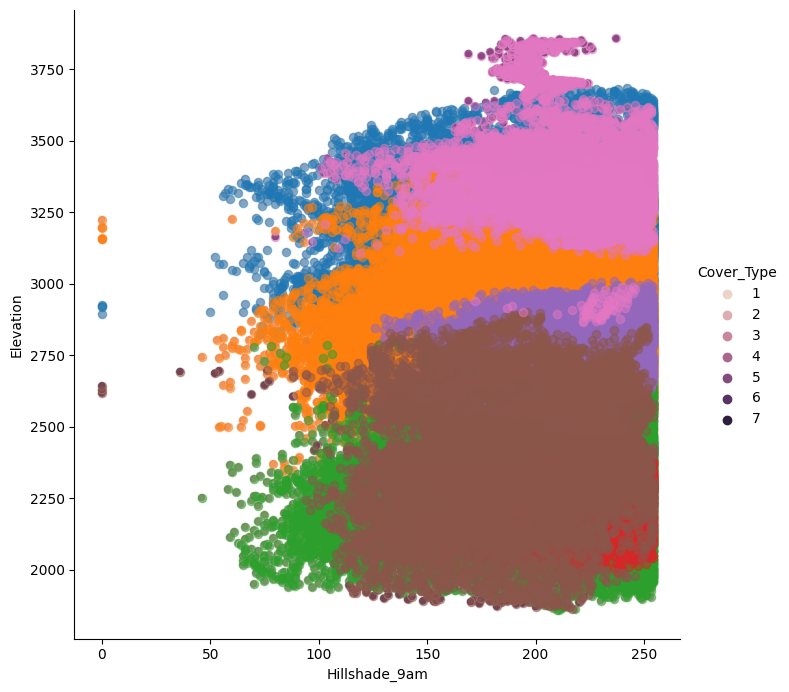

In [ ]:
h9_al = sns.pairplot(quant_var, hue="Cover_Type", size=7,
             x_vars=['Hillshade_9am'], y_vars=['Elevation'])
h9_al.map_offdiag(plt.scatter, s=35, alpha=0.5)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


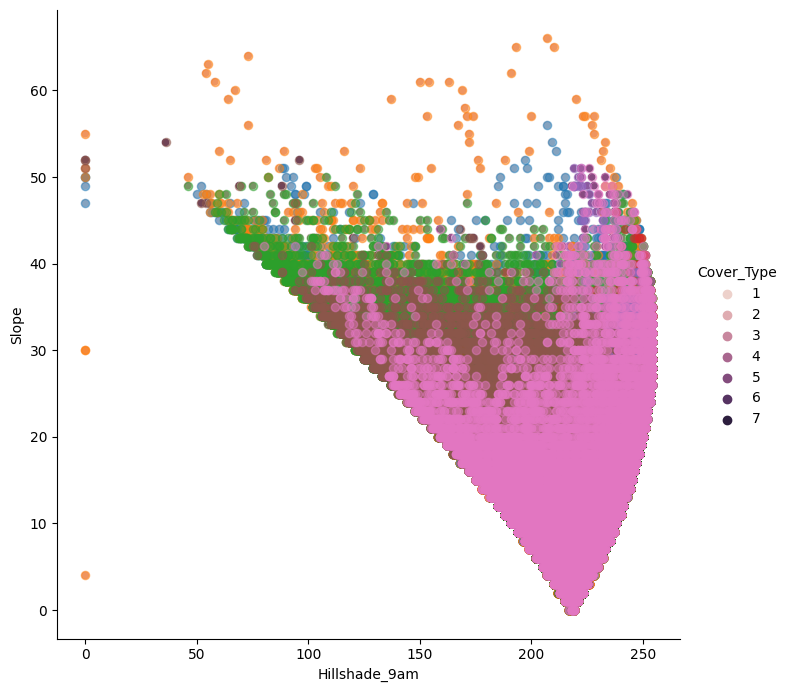

In [ ]:
h9_sl = sns.pairplot(quant_var, hue="Cover_Type", size=7,
             x_vars=['Hillshade_9am'], y_vars=['Slope'])
h9_sl.map_offdiag(plt.scatter, s=35, alpha=0.5)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


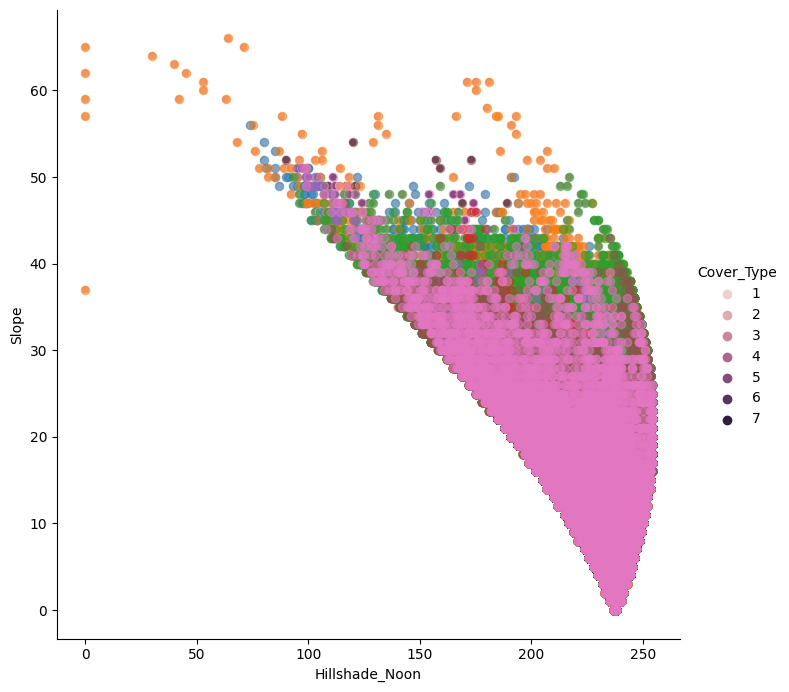

In [ ]:
h12_sl = sns.pairplot(quant_var, hue="Cover_Type", size=7,
             x_vars=['Hillshade_Noon'], y_vars=['Slope'])
h12_sl.map_offdiag(plt.scatter, s=35, alpha=0.5)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


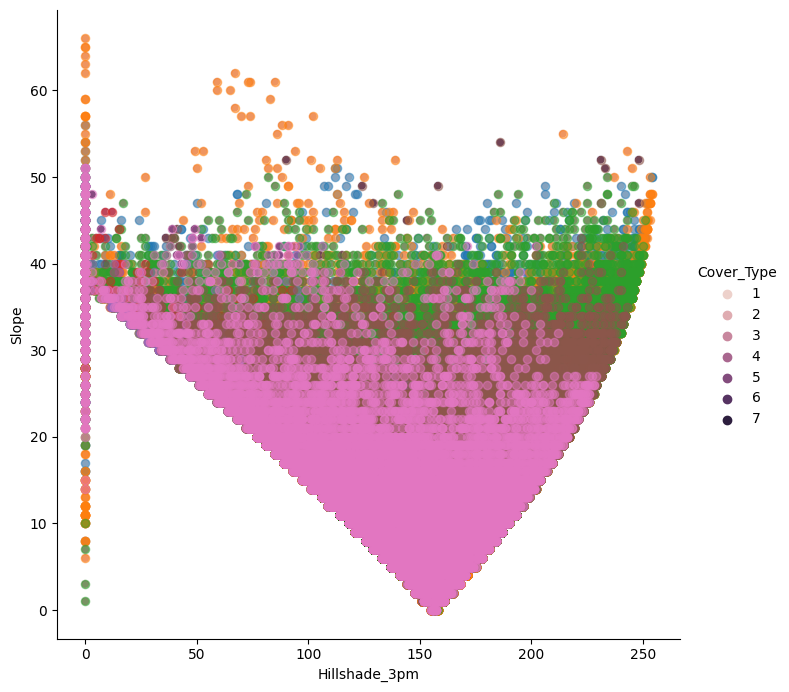

In [ ]:
h15_sl = sns.pairplot(quant_var, hue="Cover_Type", size=7,
             x_vars=['Hillshade_3pm'], y_vars=['Slope'])
h15_sl.map_offdiag(plt.scatter, s=35, alpha=0.5)

# Hillshades (https://earthquake.usgs.gov/education/geologicmaps/hillshades.php)
Shaded relief, or hillshading, is a technique where a lighting effect is added to a map based on elevation variations within the landscape. It provides a clearer picture of the topography by mimicing the sun’s effects (illumination, shading and shadows) on hills and canyons.

In [ ]:
quant_var

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,5
...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,3


##Random forest1 - Slope&Elavationの関係性
###ChatGPT引用↓
Prompt : I want to ues Cover type dataset to perform cross validation using RendomForest model, generate predictions for the test data.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Optimal Hyperparameters with RandomizedSearchCV:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}
Accuracy:  0.6673321721410229

Classification report:
               precision    recall  f1-score   support

           1       0.65      0.66      0.66     53272
           2       0.70      0.76      0.73     70584
           3       0.58      0.60      0.59      8884
           4       0.52      0.17      0.25       678
           5       0.36      0.01      0.02      2323
           6       0.38      0.17      0.24      4364
           7       0.54      0.32      0.40      5148

    accuracy                           0.67    145253
   macro avg       0.53      0.39      0.41    145253
weighted avg       0.65      0.67      0.66    145253


Confusion matrix:
 [[35230 16733    11     0     4     0  1294]
 [15448 53829   970     3    31   211    92]
 [    1  2496  5334    81     2   970   

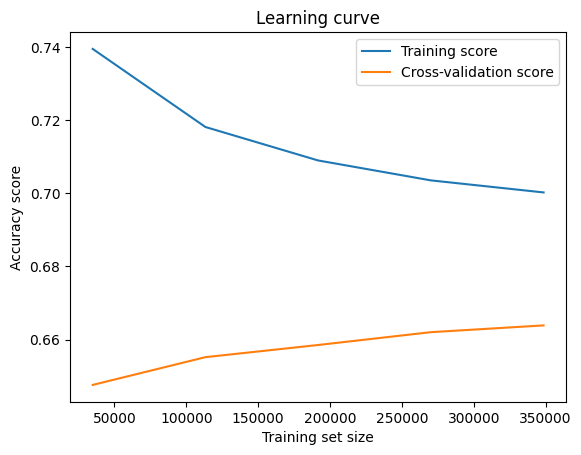

Accuracy on training data:  0.6974176092748514
Accuracy on test data:  0.6673321721410229
Difference in accuracy:  0.030085437133828496


In [ ]:
X = data[['Slope', 'Elevation']]
y = covtype.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10, 
    cv=5, 
    n_jobs=-1, 
    verbose=2  
)

random_search.fit(X_train, y_train)


print("Optimal Hyperparameters with RandomizedSearchCV: ", random_search.best_params_)

best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
print("\nClassification report:\n", classification_report(y_test, predictions))
print("\nConfusion matrix:\n", confusion_matrix(y_test, predictions))

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, validation_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.title("Learning curve")
plt.show()

train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions)

print("Accuracy on training data: ", train_accuracy)
print("Accuracy on test data: ", test_accuracy)
print("Difference in accuracy: ", train_accuracy - test_accuracy)

## Random forest2 - 空間の拡大
 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Optimal Hyperparameters with RandomizedSearchCV:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_depth': 10}
Accuracy:  0.6783818578617997


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification report:
               precision    recall  f1-score   support

           1       0.65      0.69      0.67     53272
           2       0.71      0.76      0.74     70584
           3       0.59      0.67      0.63      8884
           4       0.63      0.16      0.25       678
           5       0.00      0.00      0.00      2323
           6       0.48      0.07      0.12      4364
           7       0.58      0.35      0.44      5148

    accuracy                           0.68    145253
   macro avg       0.52      0.39      0.41    145253
weighted avg       0.66      0.68      0.66    145253


Confusion matrix:
 [[36885 15125     3     0     0     0  1259]
 [16148 53460   855     1     0    73    47]
 [    0  2610  5991    46     0   237     0]
 [    0     3   566   106     0     3     0]
 [    0  2316     4     0     0     3     0]
 [    0  1291  2770    16     0   287     0]
 [ 3312    28     0     0     0     0  1808]]


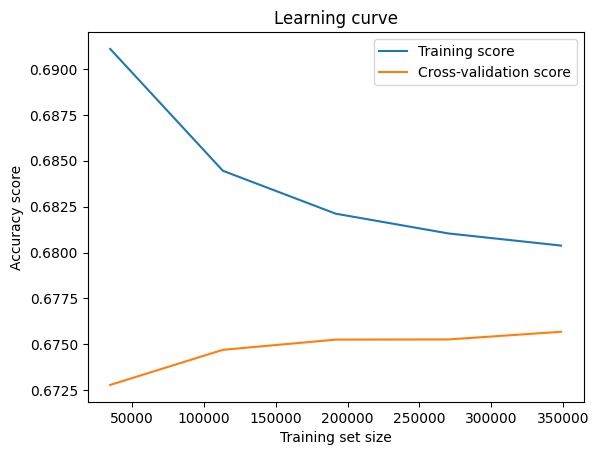

Accuracy on training data:  0.6798482647518468
Accuracy on test data:  0.6783818578617997
Difference in accuracy:  0.0014664068900470673


In [ ]:
X = data[['Slope', 'Elevation']]
y = covtype.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10, 
    cv=5, 
    n_jobs=-1, 
    verbose=2  
)

random_search.fit(X_train, y_train)


print("Optimal Hyperparameters with RandomizedSearchCV: ", random_search.best_params_)

best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
print("\nClassification report:\n", classification_report(y_test, predictions))
print("\nConfusion matrix:\n", confusion_matrix(y_test, predictions))

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, validation_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.title("Learning curve")
plt.show()

train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions)

print("Accuracy on training data: ", train_accuracy)
print("Accuracy on test data: ", test_accuracy)
print("Difference in accuracy: ", train_accuracy - test_accuracy)

##Random forest3 - ツリー縮小
###<br>変更項目:'max_depth': [None, 10, 20, 30] ->  'max_depth': [None, 10, 20]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Optimal Hyperparameters with RandomizedSearchCV:  {'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 10}
Accuracy:  0.6783612042436301


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification report:
               precision    recall  f1-score   support

           1       0.65      0.69      0.67     53272
           2       0.71      0.76      0.74     70584
           3       0.59      0.67      0.63      8884
           4       0.64      0.16      0.26       678
           5       0.00      0.00      0.00      2323
           6       0.48      0.07      0.12      4364
           7       0.58      0.35      0.43      5148

    accuracy                           0.68    145253
   macro avg       0.52      0.39      0.41    145253
weighted avg       0.66      0.68      0.66    145253


Confusion matrix:
 [[36940 15073     3     0     0     0  1256]
 [16195 53398   869     1     0    74    47]
 [    0  2603  5995    44     0   242     0]
 [    0     3   562   109     0     4     0]
 [    0  2314     5     0     0     4     0]
 [    0  1287  2757    16     0   304     0]
 [ 3332    28     0     0     0     0  1788]]


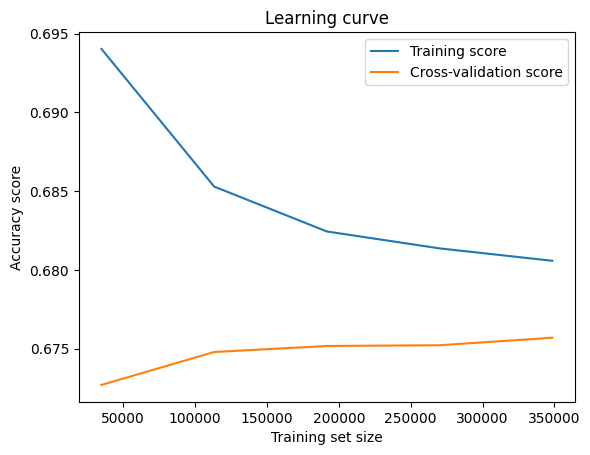

Accuracy on training data:  0.6797771245114845
Accuracy on test data:  0.6783612042436301
Difference in accuracy:  0.0014159202678544203


In [ ]:
X = data[['Slope', 'Elevation']]
y = covtype.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10, 
    cv=5, 
    n_jobs=-1, 
    verbose=2  
)

random_search.fit(X_train, y_train)


print("Optimal Hyperparameters with RandomizedSearchCV: ", random_search.best_params_)

best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
print("\nClassification report:\n", classification_report(y_test, predictions))
print("\nConfusion matrix:\n", confusion_matrix(y_test, predictions))

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, validation_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.title("Learning curve")
plt.show()

train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions)

print("Accuracy on training data: ", train_accuracy)
print("Accuracy on test data: ", test_accuracy)
print("Difference in accuracy: ", train_accuracy - test_accuracy)

##Random forest4 
###<br>変更項目:
<br>'min_samples_split': [2, 5, 10, 15],
<br>'min_samples_leaf': [1, 2, 4, 8] 
<br>-> 
<br>'min_samples_split': [2, 5],
<br>'min_samples_leaf': [1, 2]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Optimal Hyperparameters with RandomizedSearchCV:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Accuracy:  0.6783474351648503

Classification report:
               precision    recall  f1-score   support

           1       0.65      0.69      0.67     53272
           2       0.71      0.76      0.74     70584
           3       0.59      0.68      0.63      8884
           4       0.62      0.16      0.25       678
           5       1.00      0.00      0.00      2323
           6       0.48      0.07      0.12      4364
           7       0.58      0.35      0.44      5148

    accuracy                           0.68    145253
   macro avg       0.66      0.39      0.41    145253
weighted avg       0.68      0.68      0.66    145253


Confusion matrix:
 [[36795 15203     3     0     0     0  1271]
 [16074 53533   856     1     0    74    46]
 [    0  2596  5997    45     0   246    

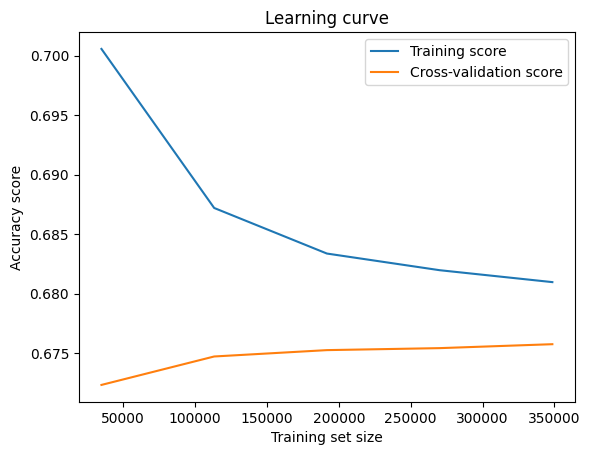

Accuracy on training data:  0.68007315970525
Accuracy on test data:  0.6783474351648503
Difference in accuracy:  0.0017257245403996535


In [ ]:
X = data[['Slope', 'Elevation']]
y = covtype.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split':[2, 5],
    'min_samples_leaf': [1, 2]
}

model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10, 
    cv=5, 
    n_jobs=-1, 
    verbose=2  
)

random_search.fit(X_train, y_train)


print("Optimal Hyperparameters with RandomizedSearchCV: ", random_search.best_params_)

best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
print("\nClassification report:\n", classification_report(y_test, predictions))
print("\nConfusion matrix:\n", confusion_matrix(y_test, predictions))

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, validation_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.title("Learning curve")
plt.show()

train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions)

print("Accuracy on training data: ", train_accuracy)
print("Accuracy on test data: ", test_accuracy)
print("Difference in accuracy: ", train_accuracy - test_accuracy)

##Random forest5 
###変更項目: RandomizedSearchCV -> GridSearchCV
###空間の広さを少し減らして行いました。
###ChatGPT引用 (GridSearchCV変更)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.645 total time=  17.2s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.643 total time=  17.1s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.645 total time=  17.1s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.645 total time=  34.3s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.643 total time=  34.4s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.646 total time=  35.7s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.648 total time=  16.8s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.646 tot

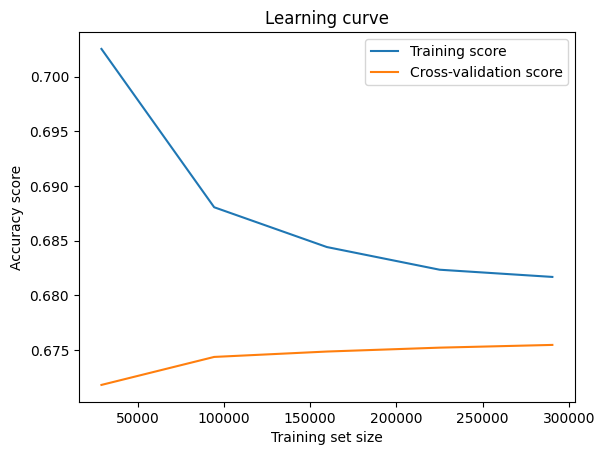

Accuracy on training data:  0.68007315970525
Accuracy on test data:  0.6783818578617997
Difference in accuracy:  0.0016913018434502325


In [ ]:
X = data[['Slope', 'Elevation']]
y = covtype.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {'n_estimators': [50, 100],
              'max_depth': [None, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2]}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, refit=True, verbose=3, cv=3)
grid.fit(X_train, y_train)

print("Best parameters found: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)

predictions = grid.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))

# Classification report
print("\nClassification report:\n", classification_report(y_test, predictions))

# Confusion matrix
print("\nConfusion matrix:\n", confusion_matrix(y_test, predictions))


train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, validation_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.title("Learning curve")
plt.show()

train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions)

print("Accuracy on training data: ", train_accuracy)
print("Accuracy on test data: ", test_accuracy)
print("Difference in accuracy: ", train_accuracy - test_accuracy)

##SVM ->時間がかかりすぎて適切なアルゴリズムではないってことを分かるようになりました。

In [ ]:
X = data[['Aspect', 'Elevation']]
y = covtype.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'C': [1, 10],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}

model = SVC(random_state=42)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=2, 
    cv=2,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Optimal Hyperparameters with RandomizedSearchCV: ", random_search.best_params_)

best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
print("\nClassification report:\n", classification_report(y_test, predictions))
print("\nConfusion matrix:\n", confusion_matrix(y_test, predictions))

NameError: ignored

# KNN
ChatGPT引用

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimal Hyperparameters with RandomizedSearchCV:  {'weights': 'uniform', 'p': 1, 'n_neighbors': 11}
Accuracy:  0.6552222673542026

Classification report:
               precision    recall  f1-score   support

           1       0.64      0.64      0.64     53272
           2       0.69      0.76      0.72     70584
           3       0.58      0.61      0.59      8884
           4       0.53      0.16      0.25       678
           5       0.33      0.01      0.02      2323
           6       0.38      0.14      0.21      4364
           7       0.54      0.31      0.39      5148

    accuracy                           0.66    145253
   macro avg       0.53      0.38      0.40    145253
weighted avg       0.64      0.66      0.64    145253


Confusion matrix:
 [[34040 17940     9     0     4     1  1278]
 [15974 53398   927     2    47   162    74]
 [    6  2606  5396    73     5   798     0]
 [    0     4   515   110     0 

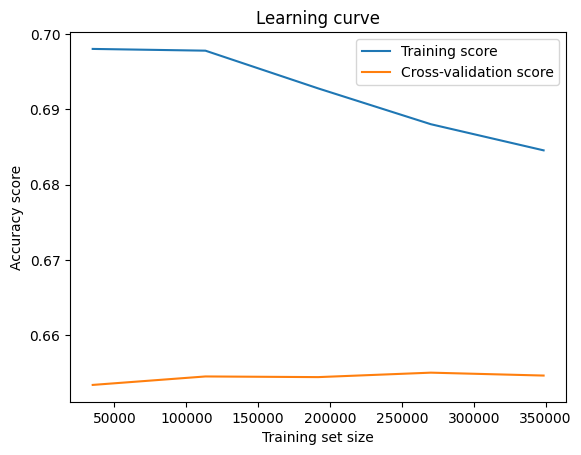

Accuracy on training data:  0.6816267707609023
Accuracy on test data:  0.6552222673542026
Difference in accuracy:  0.026404503406699642


In [ ]:
X = data[['Slope', 'Elevation']]
y = covtype.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

model = KNeighborsClassifier()

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=12,  
    cv=5,
    n_jobs=-1, 
    verbose=2,  
    random_state=42
)

random_search.fit(X_train, y_train)

print("Optimal Hyperparameters with RandomizedSearchCV: ", random_search.best_params_)

best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
print("\nClassification report:\n", classification_report(y_test, predictions))
print("\nConfusion matrix:\n", confusion_matrix(y_test, predictions))

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, validation_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.title("Learning curve")
plt.show()

train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions)

print("Accuracy on training data: ", train_accuracy)
print("Accuracy on test data: ", test_accuracy)
print("Difference in accuracy: ", train_accuracy - test_accuracy)